## Ridge and Lasso - Visualizing Optimal Solutions

Adapted from the post by Xavier Bourret Sicotte https://xavierbourretsicotte.github.io/ridge_lasso_visual.html

## Ridge and Lasso regression - intuition behind the optimal solution
This short notebook offers a visual intuition behind the similarity and differences between Ridge and Lasso regression. In particular we will the contour of the Ordinary Least Square (OLS) cost function, together with the $L_2$ and $L_1$ cost functions.

### Ridge regression
Recall that the Ridge minimization problem can be expressed equivalently as:

$\hat{\theta}_{ridge} = \arg \min_{\theta \in R^n} \sum_{i=1}^m (y_i − x_i^T \theta)^2 + \lambda \sum_{j=1}^n \theta^2_j$

Which can be viewed as the minimization of two terms: OLS+$L_2$. To gain an intuition consider each term separately:

The first OLS term can be written as $(y−X\theta)^T(y−X\theta)$ which gives rise to an elipse contour plot centered around the Maximum Likelihood Estimator.
The second $L_2$ term can be written as $\theta ^T \theta = \theta^2_1 + \theta^2_2 = c$ which is the equation of a circle with radius $c$.
The solution to the constrained optimization lies at the intersection between the contours of the two functions, and this intersection varies as a function of $\lambda$. For $\lambda=0$ the solution is the MLE (as usual) and for $\lambda=\infty$ the solution is at $[0,0]$.

### Lasso regression
Recall that the Lasso minimization problem can be expressed as:

$\hat{\theta}_{lasso} = \arg\min_{\theta \in R^n} \sum_{i=1}^m (y_i−x_i^T\theta)^2 + \lambda \sum_{j=1}^n |\theta_j|$

Which can be viewed as the minimization of two terms: OLS+$L_1$.

The first OLS term can be written as $(y−X\theta)^T(y−X\theta)$ which gives rise to an elipse contour plot centered around the Maximum Likelihood Estimator.
The second $L_1$ term is the equation of a diamond centered around 0.
As previously, the solution to the constrained optimization lies at the intersection between the contours of the two functions, and this intersection varies as a function of λ. For $\lambda=0$ the solution is the MLE (as usual) and for $\lambda=\infty$ the solution is at $[0,0]$.
Note that at the vertices of the diamond, one of the variables has value 0, meaning there is a probability that one of the features will have a value exactly 0

### Intuitive comparison between Ridge and Lasso
The Lasso $L_1$ term provides a much more aggressive regularization because the intersection between the constraint function and the cost function happens at the “vertices” of the diamond where either / or each variable is equal to zero. The effect of such regularization is to “cancel” out each variable, and by varying $\lambda$ we can test the impact of each variable on the model. In effect this is automatic variable selection.

On the other hand, Ridge regression provides a less aggressive form of regularization where the coefficients tend to zero in the limit only.

## Visualizing the OLS cost function, L1, L2 constraints and the solution path

### Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import linear_model

%matplotlib inline

### Helper functions

In [2]:
def costfunction(X,y,theta):
    '''OLS cost function'''
    #Initialisation of useful values 
    m = np.size(y)
    
    #Cost function in vectorized form
    h = X @ theta
    J = float((1./(2*m)) * (h - y).T @ (h - y));    
    return J;


def closed_form_solution(X,y):
    '''Linear regression closed form solution'''
    return np.linalg.inv(X.T @ X) @ X.T @ y
    
def closed_form_reg_solution(X,y,lamda = 10): 
    '''Ridge regression closed form solution'''
    m,n = X.shape
    I = np.eye((n))
    return (np.linalg.inv(X.T @ X + lamda * I) @ X.T @ y)[:,0]

def cost_l2(x,y):
    '''L2 cost functiom'''
    return x**2 + y**2

def cost_l1(x,y):
    '''L1 cost function'''
    return np.abs(x) + np.abs(y)

### Simulated dataset

In [3]:
#Creating the dataset
x = np.linspace(0,1,40)
noise = 1*np.random.uniform(  size = 40)
y = np.sin(x * 1.5 * np.pi ) 
y_noise = (y + noise).reshape(-1,1)

#Subtracting the mean so that the y's are centered
y_noise = y_noise - y_noise.mean()
X = np.vstack((2*x,x**2)).T

#Nornalizing the design matrix to facilitate visualization
X = X / np.linalg.norm(X,axis = 0)

### Computing the Ridge regularization solutions as a function of $\lambda$

Note we are using the closed form solution

In [4]:
lambda_range = np.logspace(0,4,num = 100)/1000
theta_0_list_reg_l2 = []
theta_1_list_reg_l2 = []

for l in lambda_range:
    t0, t1 = closed_form_reg_solution(X,y_noise,l)
    theta_0_list_reg_l2.append(t0)
    theta_1_list_reg_l2.append(t1)

### Computing the Lasso regularization solutions as a function of $\lambda$

Note we are using Sklearn as there is no closed form solution

In [5]:
lambda_range = np.logspace(0,2,num = 100)/1000
theta_0_list_reg_l1 = []
theta_1_list_reg_l1 = []

for l in lambda_range:
    model_sk_reg = linear_model.Lasso(alpha=l, fit_intercept=False)
    model_sk_reg.fit(X,y_noise)
    t0, t1 = model_sk_reg.coef_
    theta_0_list_reg_l1.append(t0)
    theta_1_list_reg_l1.append(t1)

### Plotting the results

In both diagrams, the contour plots are the Ridge and Lasso cost functions in the limits $\lambda = 0$ and $\lambda = \infty$. In effect they are the contour plots of OLS, $L_2$ and $L_1$ cost functions

The red dots in between are the optimal solutions as a function of $\lambda$

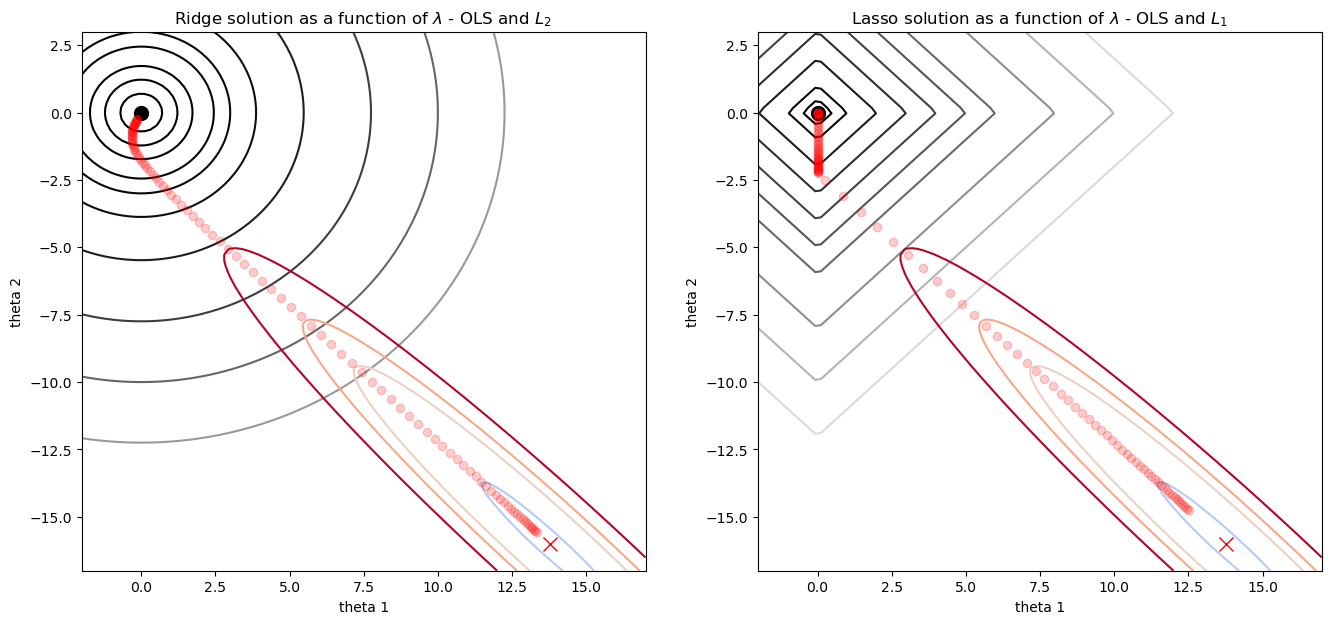

In [6]:
#Setup of meshgrid of theta values
xx, yy = np.meshgrid(np.linspace(-2,17,100),np.linspace(-17,3,100))

#Computing the cost function for each theta combination
zz_l2 = np.array(  [cost_l2(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L2 function

zz_l1 = np.array(  [cost_l1(xi, yi )for xi, yi in zip(np.ravel(xx), np.ravel(yy)) ] ) #L1 function

zz_ls = np.array(  [costfunction(X, y_noise.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                     for t0, t1 in zip(np.ravel(xx), np.ravel(yy)) ] ) #least square cost function

#Reshaping the cost values    
Z_l2 = zz_l2.reshape(xx.shape)
Z_ls = zz_ls.reshape(xx.shape)
Z_l1 = zz_l1.reshape(xx.shape)

#Defining the global min of each function
min_ls = np.linalg.inv(X.T@X)@X.T@y_noise
min_l2 = np.array([0.,0.])
min_l1 = np.array([0.,0.])

#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)
#ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray', label = 'l2')
#ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ')

#Plotting the minimum - L2 
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

#Plotting the path of L2 regularized minimum
ax.plot(theta_0_list_reg_l2,theta_1_list_reg_l2, linestyle = 'none', marker = 'o', color = 'red', alpha = .2)


#Plotting the contours - L1 
ax = fig.add_subplot(1, 2, 2)
#ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
#ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray')
ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm')
ax.set_xlabel('theta 1')
ax.set_ylabel('theta 2')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ')

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

#Plotting the path of L1 regularized minimum
ax.plot(theta_0_list_reg_l1,theta_1_list_reg_l1, linestyle = 'none', marker = 'o', color = 'red', alpha = .2)

plt.show()

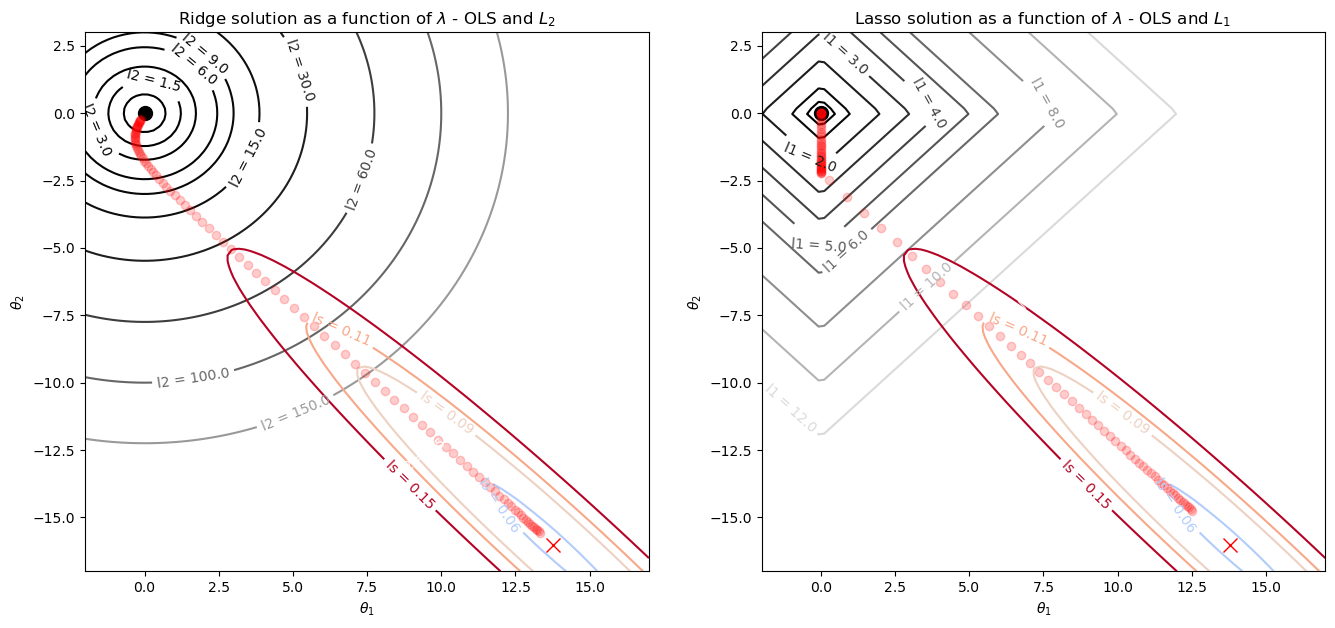

In [7]:
#Plotting the contours - L2 
fig = plt.figure(figsize = (16,7))
ax = fig.add_subplot(1, 2, 1)
#ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250],  cmap = 'gist_gray', label = 'l2')
#ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
contours1 = ax.contour(xx, yy, Z_l2, levels = [.5,1.5,3,6,9,15,30,60,100,150,250], cmap = 'gist_gray')
#print(contours1.levels)
ax.clabel(contours1, contours1.levels[0:12], inline=True, fontsize=10, fmt="l2 = %3.1f", use_clabeltext=True)
contours2 = ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm')
#print(contours2.levels)
ax.clabel(contours2, contours2.levels, inline=True, fontsize=10, fmt="ls = %1.2f", use_clabeltext=True)
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_2$')
ax.set_title('Ridge solution as a function of $\\lambda$ - OLS and $L_2$ ')

#Plotting the minimum - L2 
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

#Plotting the path of L2 regularized minimum
ax.plot(theta_0_list_reg_l2,theta_1_list_reg_l2, linestyle = 'none', marker = 'o', color = 'red', alpha = .2)


#Plotting the contours - L1 
ax = fig.add_subplot(1, 2, 2)
#ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray', label = 'l_1')
#ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm', label = 'least squares')
contours3 = ax.contour(xx, yy, Z_l1, levels = [.5,1,2,3,4,5,6,8,10,12,14],  cmap = 'gist_gray')
ax.clabel(contours3, contours3.levels[0:12], inline=True, fontsize=10, fmt="l1 = %2.1f", use_clabeltext=True)
contours4 = ax.contour(xx, yy, Z_ls, levels = [.01,.06,.09,.11,.15], cmap = 'coolwarm')
ax.clabel(contours4, contours4.levels[0:12], inline=True, fontsize=10, fmt="ls = %1.2f", use_clabeltext=True)
ax.set_xlabel('$\\theta_1$')
ax.set_ylabel('$\\theta_2$')
ax.set_title('Lasso solution as a function of $\\lambda$ - OLS and $L_1$ ')

#Plotting the minimum - L1
ax.plot(min_ls[0],min_ls[1], marker = 'x', color = 'red', markersize = 10)
ax.plot(0,0, marker = 'o', color = 'black', markersize = 10)

#Plotting the path of L1 regularized minimum
ax.plot(theta_0_list_reg_l1,theta_1_list_reg_l1, linestyle = 'none', marker = 'o', color = 'red', alpha = .2)

plt.show()